# Text Classification in Python using Sklearn and Random Forest Classifier

In [1]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,Classification,tweets
0,Class_B,Niggers are stupid and violent.
1,Class_A,Modern history classes instill a subconscious ...
2,Class_A,niggers come on this app and show how tragic t...
3,Class_A,"nobody hypes me more than boyfriend ,right aft..."
4,Class_B,"You have vandalized my heart, raped my soul, a..."


In [3]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

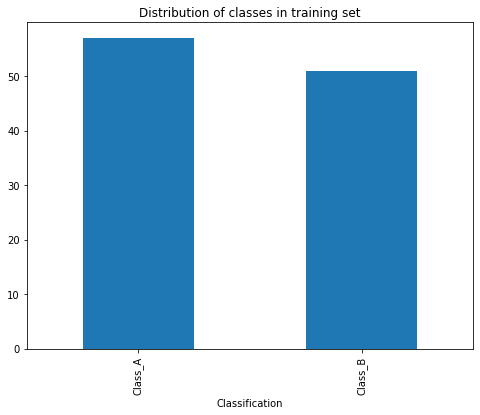

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Classification').tweets.count().plot.bar(ylim=0)
plt.title('Distribution of classes in training set')
plt.show()

In [6]:
import csv
import numpy as np
trainX=[]
with open('train.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        trainX.append((row['tweets']))

In [7]:
trainY=[]
with open('train.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        for j in df['Classification']:
            if j=='Class_A':
                val=0
                trainY.append(val)
            else:
                val=1
                trainY.append(val)
del trainY[len(df):]
print(len(trainY))
print(trainY[0])

108
1


In [23]:
import pandas as pd
y_pred=[]
vectorizer = CountVectorizer(min_df=1)
X = vectorizer.fit_transform(trainX)
clf = RandomForestClassifier()
clf.fit(X, trainY)
df2=pd.read_csv('test_tweets.csv')
for k in df2['tweets']:
    k=int(clf.predict(vectorizer.transform([k])))
    if k==0:
        clAss='Class_A'
        print(clAss)
        y_pred.append(clAss)
    else:
        clAss='Class_B'
        print(clAss)
        y_pred.append(clAss)

Class_B
Class_A
Class_A
Class_A
Class_B
Class_B
Class_B
Class_B
Class_A
Class_B
Class_A
Class_B
Class_B
Class_A
Class_A
Class_A
Class_A
Class_B
Class_A
Class_A
Class_B
Class_B
Class_A
Class_A
Class_B
Class_B
Class_A
Class_A
Class_A
Class_A


In [24]:
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print ('\nClasification report:\n', classification_report(df2['TRUE'],y_pred))
print ('\nConfussion matrix:\n',confusion_matrix(df2['TRUE'],y_pred))


Clasification report:
               precision    recall  f1-score   support

     Class_A       1.00      0.94      0.97        18
     Class_B       0.92      1.00      0.96        12

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


Confussion matrix:
 [[17  1]
 [ 0 12]]


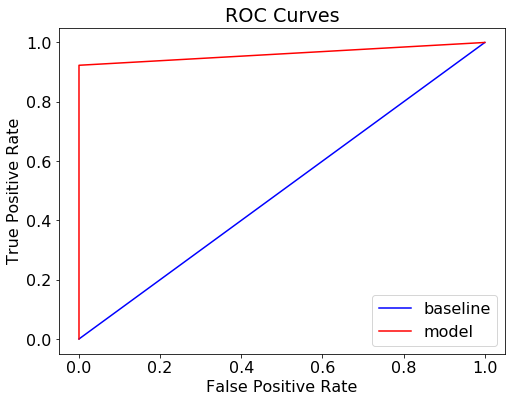

In [25]:
test_labels=[]
for i in df2['TRUE']:
    if i=='Class_A':
        test_labels.append(0)
    else:
        test_labels.append(1)
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

y_pree=[]
for j in y_pred:
    if j=='Class_A':
        y_pree.append(0)
    else:
        y_pree.append(1)

# Calculate roc auc
roc_value = roc_auc_score(y_pree, test_labels)
base_fpr, base_tpr, _ = roc_curve(test_labels, [1 for _ in range(len(test_labels))])
model_fpr, model_tpr, _ = roc_curve(y_pree, test_labels)

plt.figure(figsize = (8, 6))
plt.rcParams['font.size'] = 16
    
# Plot curves
plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
plt.plot(model_fpr, model_tpr, 'r', label = 'model')
plt.legend();
plt.xlabel('False Positive Rate'); 
plt.ylabel('True Positive Rate'); plt.title('ROC Curves');
plt.show();

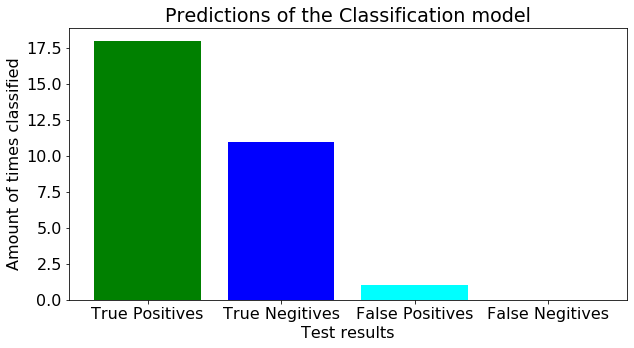

In [33]:
objects = ('True Positives', 'True Negitives', 'False Positives','False Negitives')
y_pos = np.arange(len(objects))
performance = [18,11,1,0]
plt.rcParams["figure.figsize"] = (10,5)
plt.bar(y_pos, performance, align='center', alpha=1,color=['green', 'blue', 'cyan','red'])
plt.xticks(y_pos, objects)
plt.xlabel('Test results')
plt.ylabel('Amount of times classified')
plt.title('Predictions of the Classification model')
plt.show()

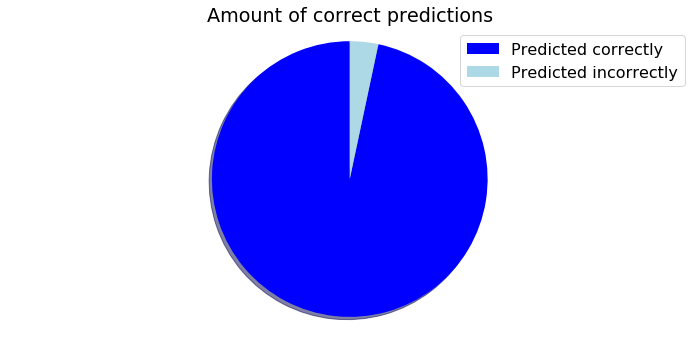

In [34]:
labels = 'Predicted correctly', 'Predicted incorrectly'
sizes = [29,1]
colors = ['blue', 'lightblue']
plt.title('Amount of correct predictions')
patches, texts = plt.pie(sizes,colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, "Most Common words used in the Eloit Rodger's manifesto")

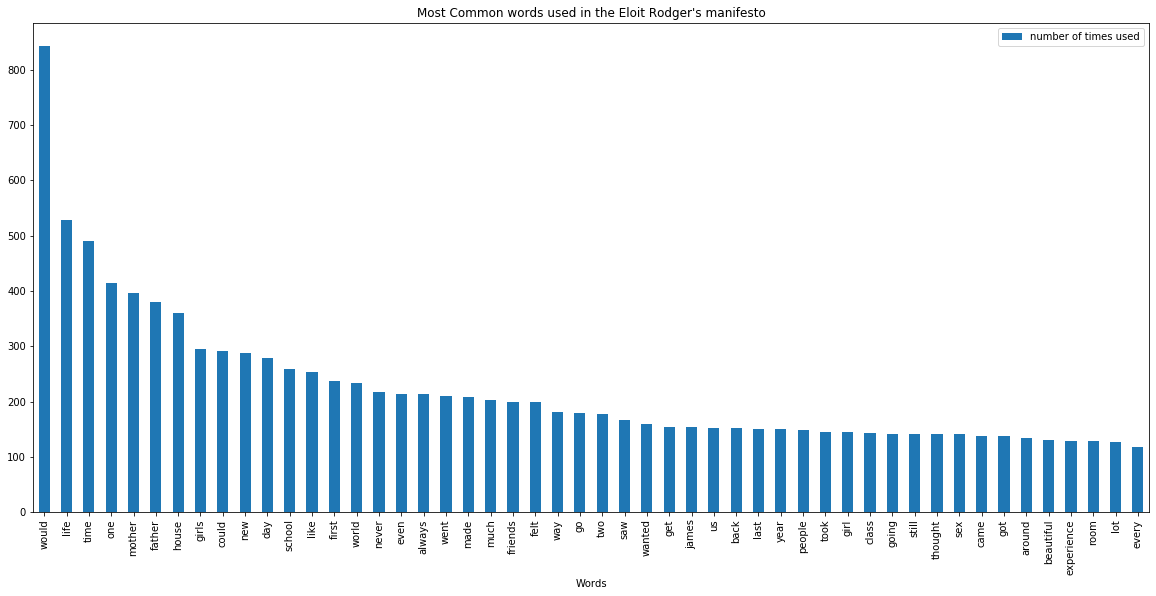

In [93]:
from collections import Counter
import pandas as pd
import re
from nltk.corpus import stopwords
words = re.findall(r'\w+', open("Eloit Rodger.txt").read().lower())
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]
count = Counter(words).most_common(50)
plt.rcParams["figure.figsize"] = (20,9)
df = pd.DataFrame(count, columns = ['Words', 'number of times used'])
df.plot.bar(x='Words',y='number of times used')
plt.title("Most Common words used in the Eloit Rodger's manifesto")

Text(0.5, 1.0, "Most Common words used in Dylann Roof's manifesto")

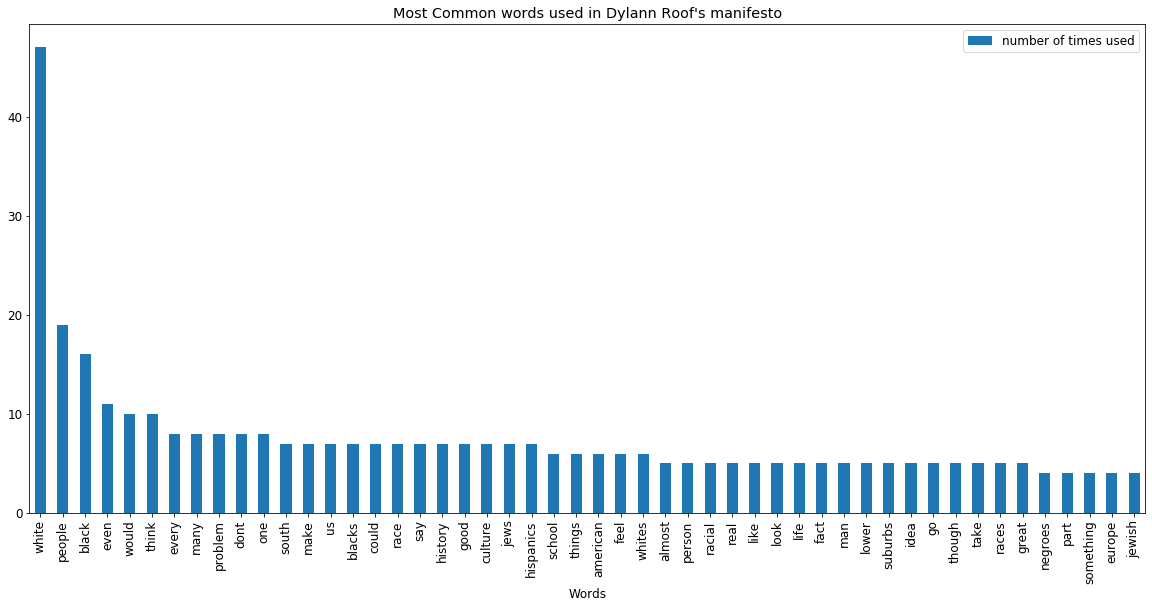

In [42]:
words = re.findall(r'\w+', open("Dylan Roof.txt").read().lower())
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]
count = Counter(words).most_common(50)
plt.rcParams["figure.figsize"] = (20,9)
df = pd.DataFrame(count, columns = ['Words', 'number of times used'])
df.plot.bar(x='Words',y='number of times used')
plt.title("Most Common words used in Dylann Roof's manifesto")

Text(0.5, 1.0, 'Most Common words used in the Natural Selector')

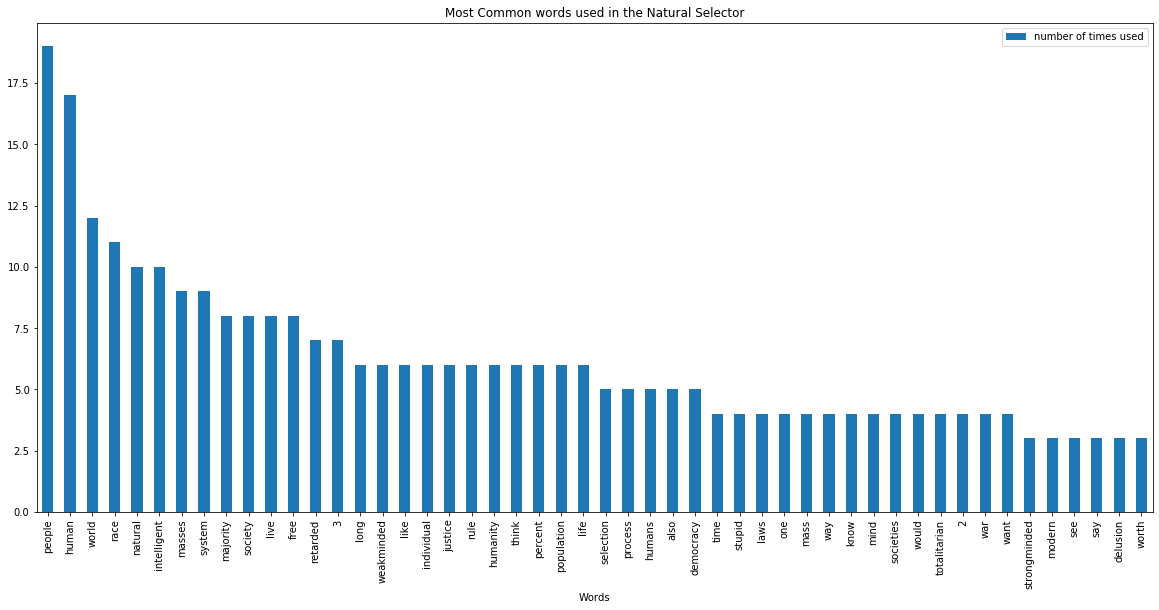

In [84]:
words = re.findall(r'\w+', open("Natural Selector.txt").read().lower())
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]
count = Counter(words).most_common(50)
plt.rcParams["figure.figsize"] = (20,9)
df = pd.DataFrame(count, columns = ['Words', 'number of times used'])
df.plot.bar(x='Words',y='number of times used')
plt.title("Most Common words used in the Natural Selector")

Text(0.5, 1.0, 'Most Common words used in The Great Replacement')

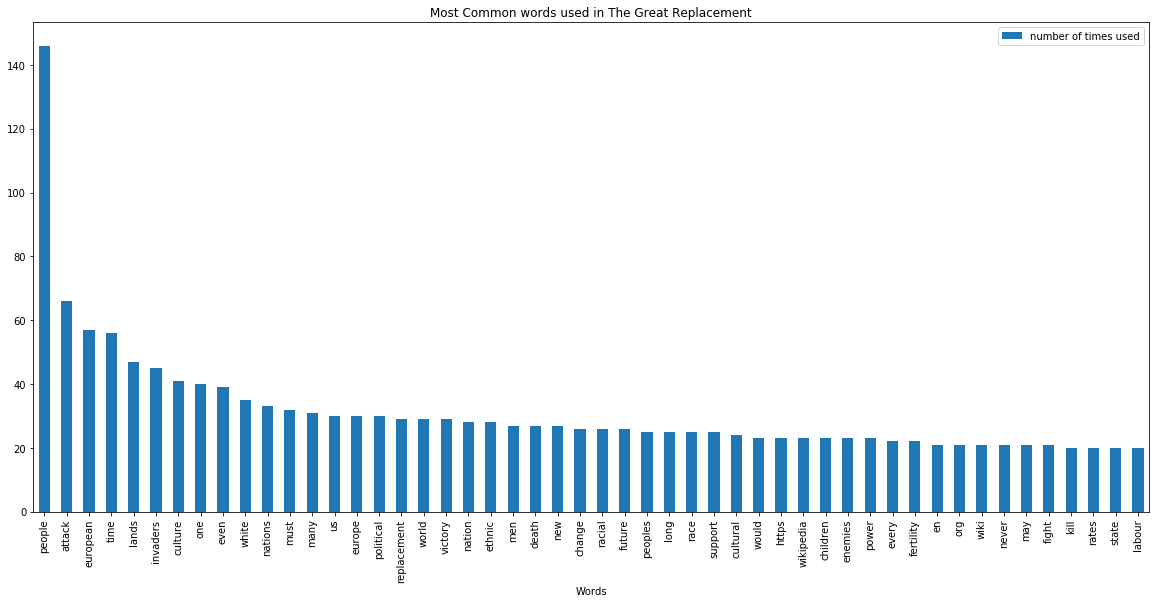

In [91]:
words = re.findall(r'\w+', open("The Great Replacement.txt", encoding="utf8").read().lower())
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]
count = Counter(words).most_common(50)
plt.rcParams["figure.figsize"] = (20,9)
df = pd.DataFrame(count, columns = ['Words', 'number of times used'])
df.plot.bar(x='Words',y='number of times used')
plt.title("Most Common words used in The Great Replacement")

Text(0.5, 1.0, "Most Common words used in El Paso Shooter's Manefesto")

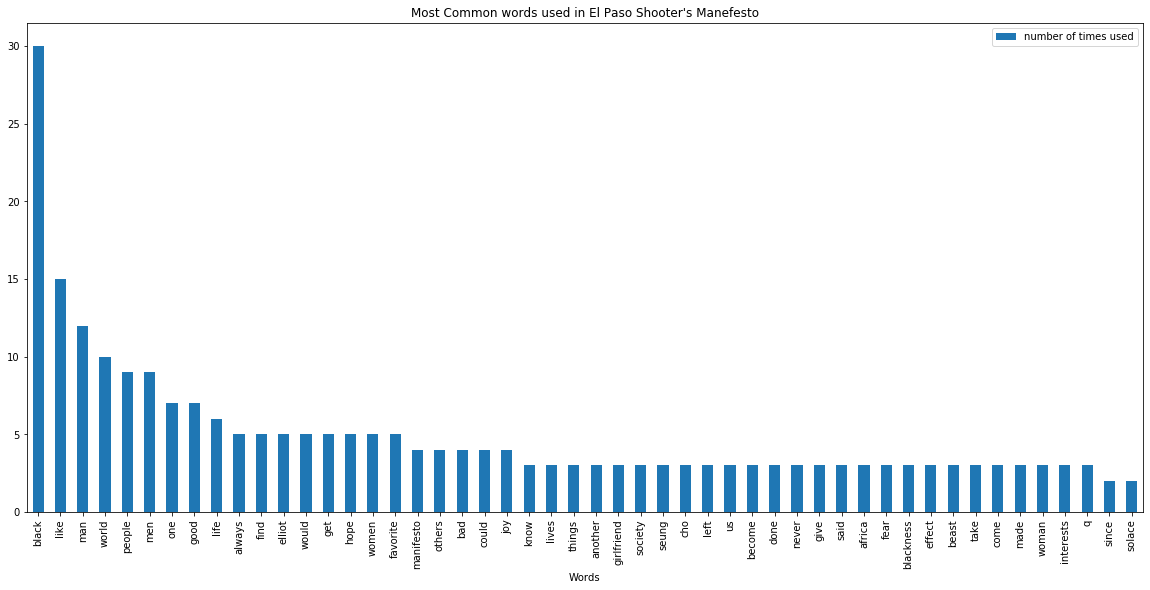

In [92]:
words = re.findall(r'\w+', open("PasoShooter.txt", encoding="utf8").read().lower())
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]
count = Counter(words).most_common(50)
plt.rcParams["figure.figsize"] = (20,9)
df = pd.DataFrame(count, columns = ['Words', 'number of times used'])
df.plot.bar(x='Words',y='number of times used')
plt.title("Most Common words used in El Paso Shooter's Manefesto")

Text(0.5, 1.0, "Most Common words used in Jim David Adkisson's Manefesto")

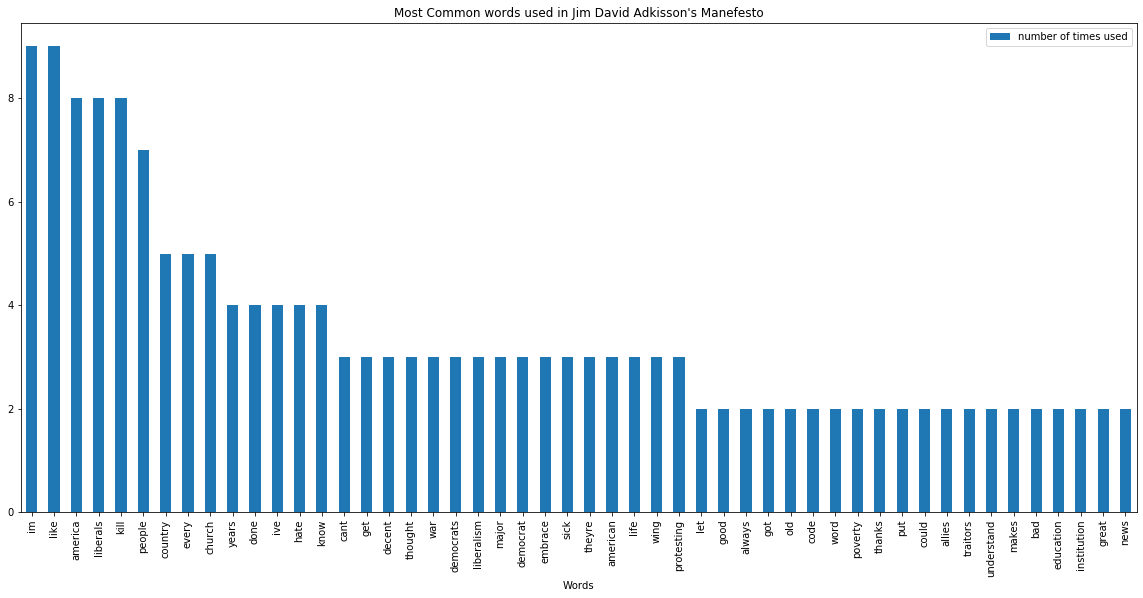

In [94]:
words = re.findall(r'\w+', open("Jim David Adkisson.txt", encoding="utf8").read().lower())
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]
count = Counter(words).most_common(50)
plt.rcParams["figure.figsize"] = (20,9)
df = pd.DataFrame(count, columns = ['Words', 'number of times used'])
df.plot.bar(x='Words',y='number of times used')
plt.title("Most Common words used in Jim David Adkisson's Manefesto")

In [26]:
importances = clf.feature_importances_
print(importances)

[2.75735294e-04 7.48894783e-05 3.80952381e-04 1.24137931e-04
 0.00000000e+00 3.51722281e-03 4.74329576e-04 6.69572491e-03
 1.85201041e-05 1.56272527e-03 3.72129014e-04 6.89319092e-04
 2.61030225e-04 7.21655933e-04 8.20266642e-04 1.85185185e-04
 8.17851764e-03 9.81780904e-04 3.08971326e-05 1.47645693e-03
 1.11497823e-03 4.31489228e-03 9.02771493e-04 1.27748112e-02
 1.17318197e-03 8.36850649e-05 3.23316450e-04 5.22931444e-04
 2.04527736e-04 3.79711974e-03 2.96495957e-04 6.63099512e-04
 1.40846037e-02 5.00000000e-05 3.33333333e-04 6.18131868e-05
 3.39916687e-04 9.10082147e-04 1.36790010e-03 4.60608309e-05
 7.60256616e-04 2.67539526e-04 0.00000000e+00 2.77332617e-03
 1.77156027e-04 4.91992382e-03 6.06011635e-07 7.68927498e-04
 5.17092998e-04 4.91093592e-03 4.43861163e-04 6.03162349e-04
 5.38905349e-05 1.80295699e-03 2.11712815e-05 6.92504925e-04
 6.08053133e-04 2.04817033e-03 2.95566502e-04 0.00000000e+00
 0.00000000e+00 3.78951260e-04 7.08487374e-03 0.00000000e+00
 1.65141416e-02 7.066210

In [27]:
std = np.std([clf.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 317 (0.048246)
2. feature 632 (0.030754)
3. feature 553 (0.026938)
4. feature 399 (0.023155)
5. feature 64 (0.016514)
6. feature 652 (0.016019)
7. feature 572 (0.015175)
8. feature 159 (0.014993)
9. feature 394 (0.014508)
10. feature 32 (0.014085)
11. feature 318 (0.013656)
12. feature 23 (0.012775)
13. feature 316 (0.011000)
14. feature 218 (0.010059)
15. feature 608 (0.009630)
16. feature 160 (0.009391)
17. feature 551 (0.008719)
18. feature 392 (0.008542)
19. feature 554 (0.008502)
20. feature 128 (0.008294)
21. feature 16 (0.008179)
22. feature 403 (0.007955)
23. feature 62 (0.007085)
24. feature 602 (0.006824)
25. feature 207 (0.006819)
26. feature 7 (0.006696)
27. feature 560 (0.006577)
28. feature 555 (0.006245)
29. feature 216 (0.006021)
30. feature 619 (0.005897)
31. feature 609 (0.005680)
32. feature 311 (0.005522)
33. feature 653 (0.005317)
34. feature 302 (0.005294)
35. feature 524 (0.005290)
36. feature 393 (0.005173)
37. feature 568 (0.005100)


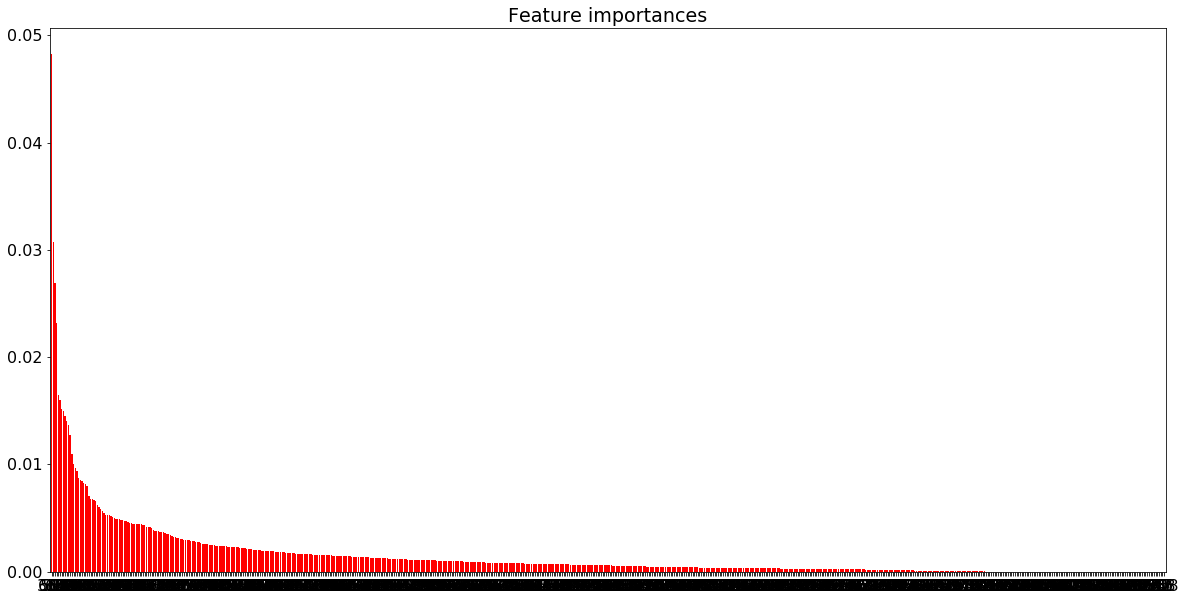

In [40]:
plt.figure()
plt.title("Feature importances")
plt.rcParams["figure.figsize"] = (20,10)
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()